In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from scipy import stats
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
# EDA functions.
def series_statistics(column):
    """
    Argumens: pandas Series or a column pandas dataframe 
    print statistical estimates of location"""
    print('statistics for column: {}'.format(column.name))
    print('The max value in the column: {}'.format(column.max()))
    print('The min value in the column: {}'.format(column.min()))
    print('The mode value in the column: {}'.format(column.mode()))
    print('The median value in the column: {}'.format(column.median()))
    print('The mean of the column: {}'.format(column.mean()))
    print('The std of the column: {}'.format(column.std()))

def miss_df(df, elements):
    """Arguments: df: a pandas Dataframe
                  elements: how many rows to return
       Returns a pandas data frame showing elements number of rows,
       name of the column and missing in %
    """
    DATASET = df
    total_missing = DATASET.isnull().sum().sort_values(ascending=False)
    percent_missing = (DATASET.isnull().sum()/DATASET.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(elements))

def printDataFrame(df):
    """Argument: a pandas dataframe
       Returns information related to EDA """
    print('The shape of this DataFrame is {}'.format(df.shape))
    print('----')
    print('The columns in this DataFrame are {}'.format(df.columns))
    print('----')
    print('The info:')
    print(df.info())
    
def get_95_ci(array_1, array_2):
    """
    Arguments: 
    The difference in means at the 95% confidence interval (two-tail) is between"""
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [9]:
path ='/home/gato/Scripts/DS/DataIntoInsights/W5_project/data/students.xlsx'
df = pd.read_excel(path)

In [10]:
printDataFrame(df)

The shape of this DataFrame is (1000, 8)
----
The columns in this DataFrame are Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
----
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 6

In [5]:
miss_df(df, len(df))

,Total,Percent
gender,0,0.0
race/ethnicity,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0


Text(0.5, 0, 'Math score')

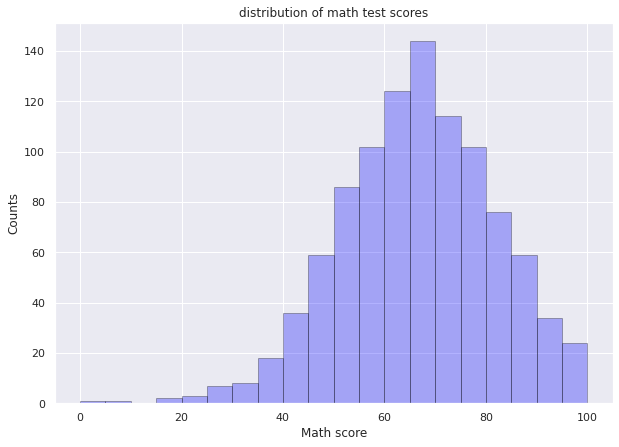

In [6]:
# hist of the math scores
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.hist(df['math score'], bins=20, color='blue', edgecolor='black', label='MathScores', alpha=0.3)
ax1.set_title('distribution of math test scores')
ax1.set_ylabel("Counts")
ax1.set_xlabel("Math score")

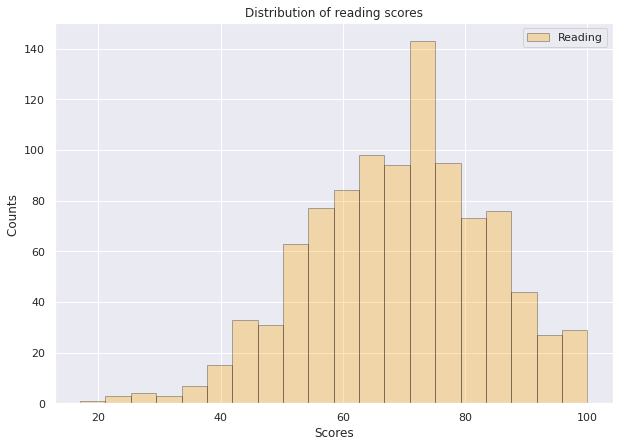

In [7]:
# hist of the reading scores
fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.hist(df['reading score'], bins=20, color='Orange', edgecolor='black', label='Reading', alpha=0.3)
ax2.set_title('Distribution of reading scores')
ax2.set_xlabel("Scores")
ax2.set_ylabel("Counts ")
ax2.legend()

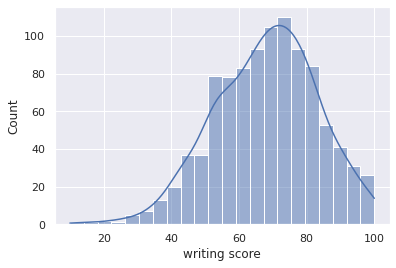

In [8]:
ax = sns.histplot(df['writing score'], kde=True)

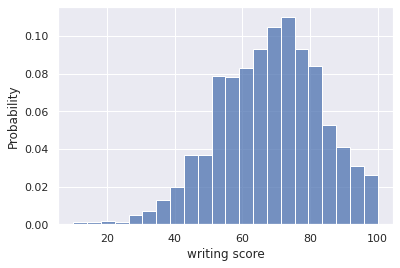

In [9]:
ax = sns.histplot(df['writing score'], stat='probability')

## Comparing the distribution of two variables

Next, visualize the relationship between two variables. Here, what you want is a scatter plot; for that, use  the `scatterplot()` function. Now, compare math and reading scores:

# the whole group

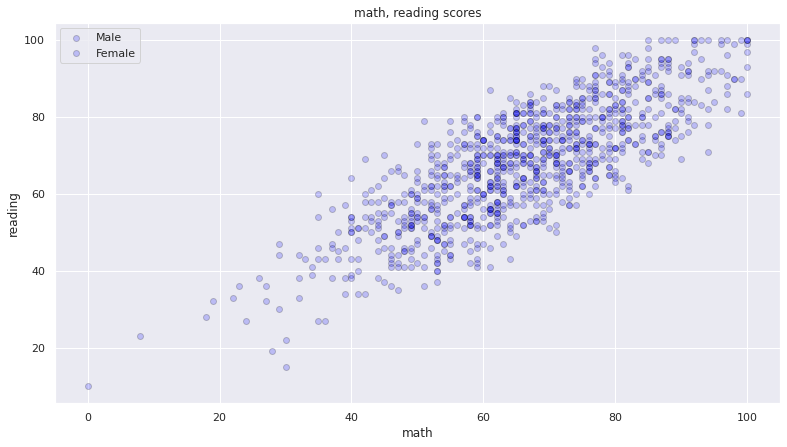

In [17]:
male_math = df[df['gender'] == 'male']['math score']
male_reading = df[df['gender'] == 'male']['writing score']
female_math = df[df['gender'] == 'female']['math score']
female_reading = df[df['gender'] == 'female']['writing score']

gender = df['gender']

fig2, ax2 = plt.subplots(figsize=(13, 7))
ax2.scatter(male_math, male_reading, c='blue', edgecolor='black', alpha=0.2, label= 'Male')
ax2.scatter(female_math, female_reading, c='blue', edgecolor='black', alpha=0.2, label='Female')
ax2.set_title('math, reading scores')
ax2.set_xlabel("math")
ax2.set_ylabel("reading")
ax2.legend()

In [11]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
df['lunch'] = df['lunch'].str.replace('standard', '1')
df['lunch'] = df['lunch'].str.replace('free/reduced', '0.25')

In [13]:
df['lunch'] = pd.to_numeric(df['lunch'], errors='coerce')

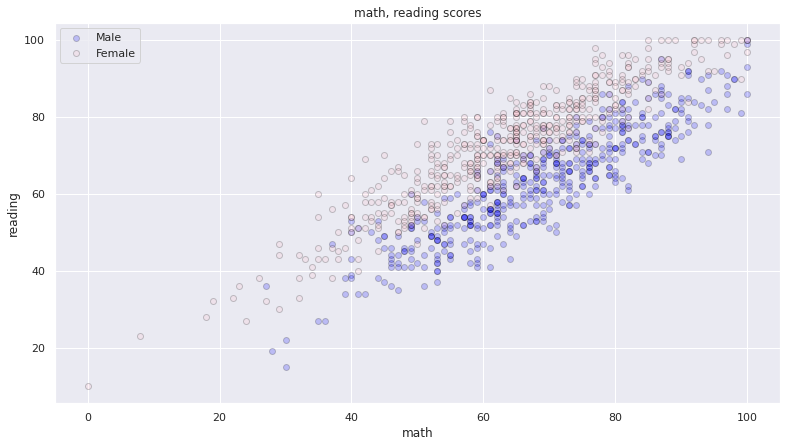

In [19]:
# male and female
lunch = df['lunch']
fig2, ax2 = plt.subplots(figsize=(13, 7))
ax2.scatter(male_math, male_reading, c='blue', edgecolor='black', alpha=0.2, label= 'Male')
ax2.scatter(female_math, female_reading, c='pink', edgecolor='black', alpha=0.2, label='Female')
ax2.set_title('math, reading scores')
ax2.set_xlabel("math")
ax2.set_ylabel("reading")
ax2.legend()

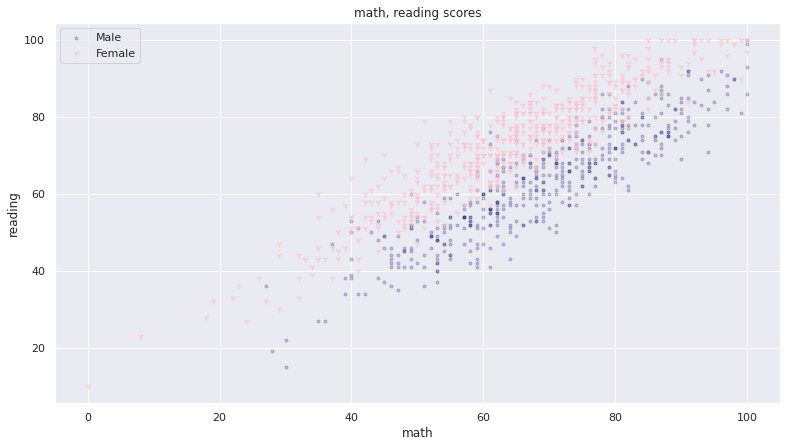

In [25]:
# 
gender = df['gender']
male_math = df[df['gender'] == 'male']['math score']
male_reading = df[df['gender'] == 'male']['writing score']
female_math = df[df['gender'] == 'female']['math score']
female_reading = df[df['gender'] == 'female']['writing score']

fig2, ax2 = plt.subplots(figsize=(13, 7))
ax2.scatter(male_math, male_reading, c='blue', edgecolor='black', alpha=0.2, label= 'Male', marker=".")
ax2.scatter(female_math, female_reading, c='pink', edgecolor='black', alpha=0.7, label='Female', marker="1")
ax2.set_title('math, reading scores')
ax2.set_xlabel("math")
ax2.set_ylabel("reading")
ax2.legend();

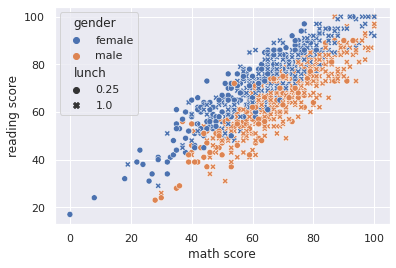

In [24]:
sns.scatterplot(x="math score", y="reading score", hue="gender", style="lunch",  data=df);

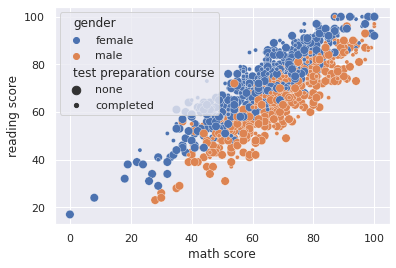

In [27]:
sns.scatterplot(x="math score", y="reading score", hue="gender", size="test preparation course",  data=df);

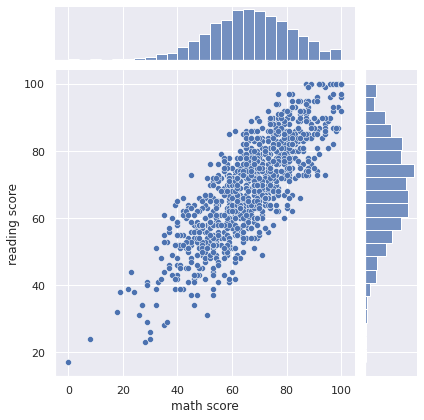

In [28]:
sns.jointplot(x="math score", y="reading score", data=df);

To plot multiple distributions in the dataset, use the pairplot() function. It will compare all variables against each other in a matrix of plots.


In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,1.00,none,72,72,74
1,female,group C,some college,1.00,completed,69,90,88
2,female,group B,master's degree,1.00,none,90,95,93
3,male,group A,associate's degree,0.25,none,47,57,44
4,male,group C,some college,1.00,none,76,78,75


In [47]:
df.iloc[:,5:]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


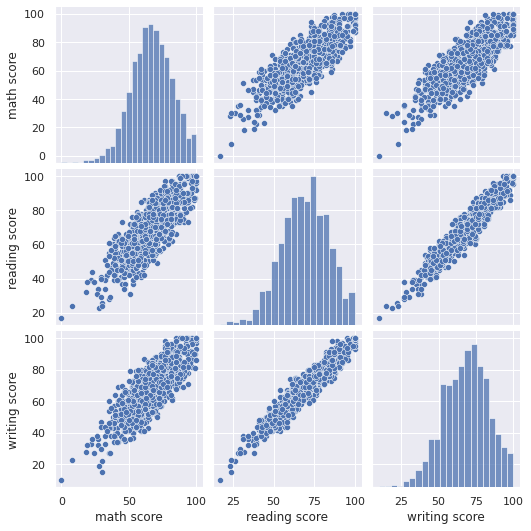

In [48]:
sns.pairplot(df.iloc[:, 5:]);

You can see strong correlations between the three scores.

Next, examine distributions with respect to categories. In the scatter plots above, the plots became progressively harder to interpret as you added categorical variables. Instead, you could use a box plot to compare these variables by category.

## Box plots

Box plots visually illustrate the distribution of values in a category. In a box plot, the median and upper and lower quartiles are clearly shown, as well as the maximum and minimum. Two or more samples may be compared using the box plot.

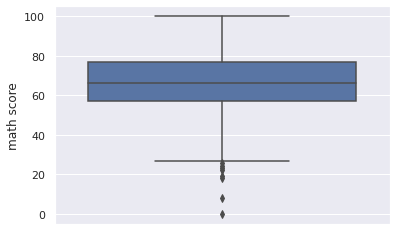

In [50]:
sns.boxplot(y="math score", data=df);

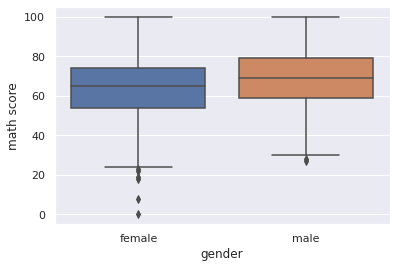

In [52]:
sns.boxplot(y="math score", x="gender", data=df);

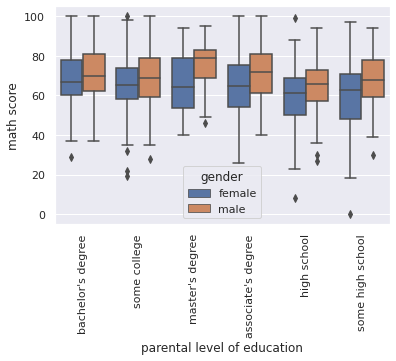

In [53]:
ax = sns.boxplot(y="math score", hue="gender", x = "parental level of education", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

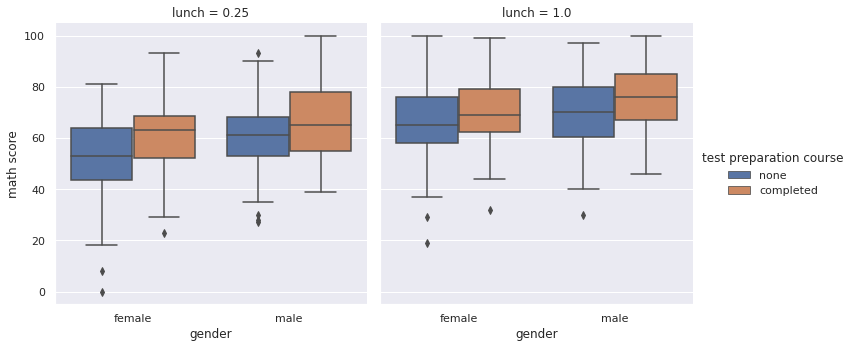

In [54]:
sns.catplot(y="math score", x="gender", hue = "test preparation course", col="lunch",
            kind="box", data=df);

## Customizing seaborn plots with pyplot

At the beginning of this lesson, it was mentioned that seaborn is based on Matplotlib. This means that you can include Matplotlib functionalities directly with seaborn plots. Explore this using the pyplot series of functions from `matplotlib.pyplot`. The standard alias for this collection is `plt`.

Like seaborn, pyplot contains too many functions to cover here; for the complete list, check out [the documentation](https://matplotlib.org/users/pyplot_tutorial.html). 

Among the most common uses of pyplot with seaborn is to add custom axis labels and a plot title. This can be done with the methods `xlabel()`, `ylabel()`, and `title()`, respectively. Call `plt.show()` to print the results of the plot. These methods will be executed with your seaborn scatter plot and compiled onto one plot. 

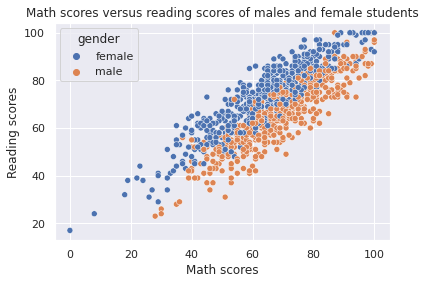

In [55]:
import matplotlib.pyplot as plt

# Custom labels
sns.scatterplot(x="math score", y="reading score", hue="gender", data=df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

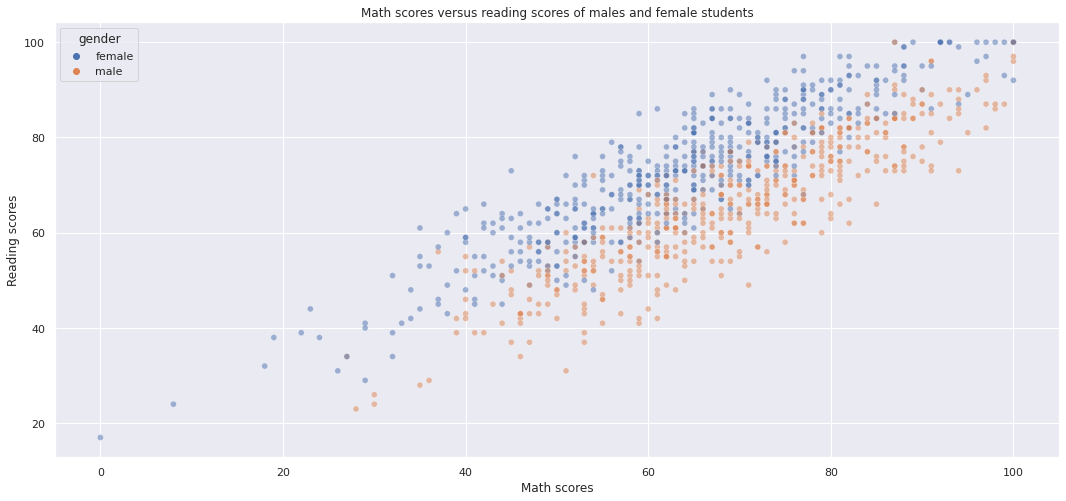

In [59]:
plt.figure(figsize = (18,8))
sns.scatterplot(x="math score", y="reading score", hue="gender", data=df, alpha=0.5)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()